For the past five years, you've honed your skills as a Senior Data Scientist for a global university. Your team leverages its data analytics and machine learning skill sets to help other departments make data-driven decisions. One such department is the procurement team, who is trying to decide the best new mobile phone to offer to the university's employees. For the last week, a Junior Data Scientist on your team has been developing a workflow to help provide insight to the procurement team. You will be reviewing their code to ensure it's ready to ship to production. 

The first chunk of code that you'll be reviewing is your colleague's function to prepare smartphone data from a CSV file for visualization. After ingesting and cleaning the smartphone data, your colleague has prepared a function to plot a variable passed to the function, versus `"price"`. However, within this function, there is code that does not adhere to DRY principles and is copied and pasted. Make sure to refactor the code appropriately, using the `column_to_label()` function defined below.

Wow, your colleague even included a unit test to ensure `NaN` values were removed from the cleaned DataFrame! However, it doesn't seem like the unit test is passing when executed. Re-work this unit test to ensure that it matches the transformation logic in the `prepare_smartphone_data()` function.

Once you've made changes to the `test_nan_values` unit test, you'll want to ensure that these unit tests execute with `ExitCode.OK`. This means that the `pytest` defined above has passed testing, and the code is one step closer to being to be shipped to production.

For context, there is a print statement in the `prepare_smartphone_data()` function in the first cell of the notebook below that can be used to visualize the dataset your Junior Data Engineer has been working with. Feel free to update this line of code as needed. This can then be removed after the dataset has been investigated. Best of luck!

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def prepare_smartphone_data(file_path):
    """
    To prepare the smartphone data for visualization, a number of transformations 
    will be applied after reading in the raw DataFrame to memory, including:
        - reducing the number of columns to only those needed for later analysis
        - removing records without a battery_capacity value
        - divide the price column by 100 to find the dollar amount
    
    :param file_path: the file path where the raw smartphone data is stored
    :return: a cleaned dataset having had the operations above applied to it
    """
    
    if os.path.exists(file_path):
        raw_data = pd.read_csv(file_path)
        print(raw_data.head()) # Check out the dataset, remove before submission
    else:
        raise Exception(f"File containing smartphone data not found at path {file_path}")

    keeped_columns = [
        "brand_name",
        "os",
        "price",
        "avg_rating",
        "processor_speed",
        "battery_capacity",
        "screen_size"
    ]
    trimmed_data = raw_data.loc[:, keeped_columns]
    
    # Remove records without a battery_capacity value
    reduced_data = trimmed_data.dropna(subset=["battery_capacity","os"])
    
    
    
    # Divide the price column by 100 to find the dollar amount
    reduced_data["price"] = reduced_data["price"] / 100
    
    return reduced_data


# Call the function
cleaned_data = prepare_smartphone_data("smartphones.csv")


  brand_name                    model   price  avg_rating  5G_or_not  \
0      apple          Apple iPhone 11   38999         7.3          0   
1      apple  Apple iPhone 11 (128GB)   46999         7.5          0   
2      apple  Apple iPhone 11 Pro Max  109900         7.7          0   
3      apple          Apple iPhone 12   51999         7.4          1   
4      apple  Apple iPhone 12 (128GB)   55999         7.5          1   

  processor_brand  num_cores  processor_speed  battery_capacity  \
0          bionic        6.0             2.65            3110.0   
1          bionic        6.0             2.65            3110.0   
2          bionic        6.0             2.65            3500.0   
3          bionic        6.0             3.10               NaN   
4          bionic        6.0             3.10               NaN   

   fast_charging_available  ...  internal_memory  screen_size  refresh_rate  \
0                        0  ...               64          6.1            60   
1     

C:\Users\behza\AppData\Local\Temp\ipykernel_6544\3816809088.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_data["price"] = reduced_data["price"] / 100


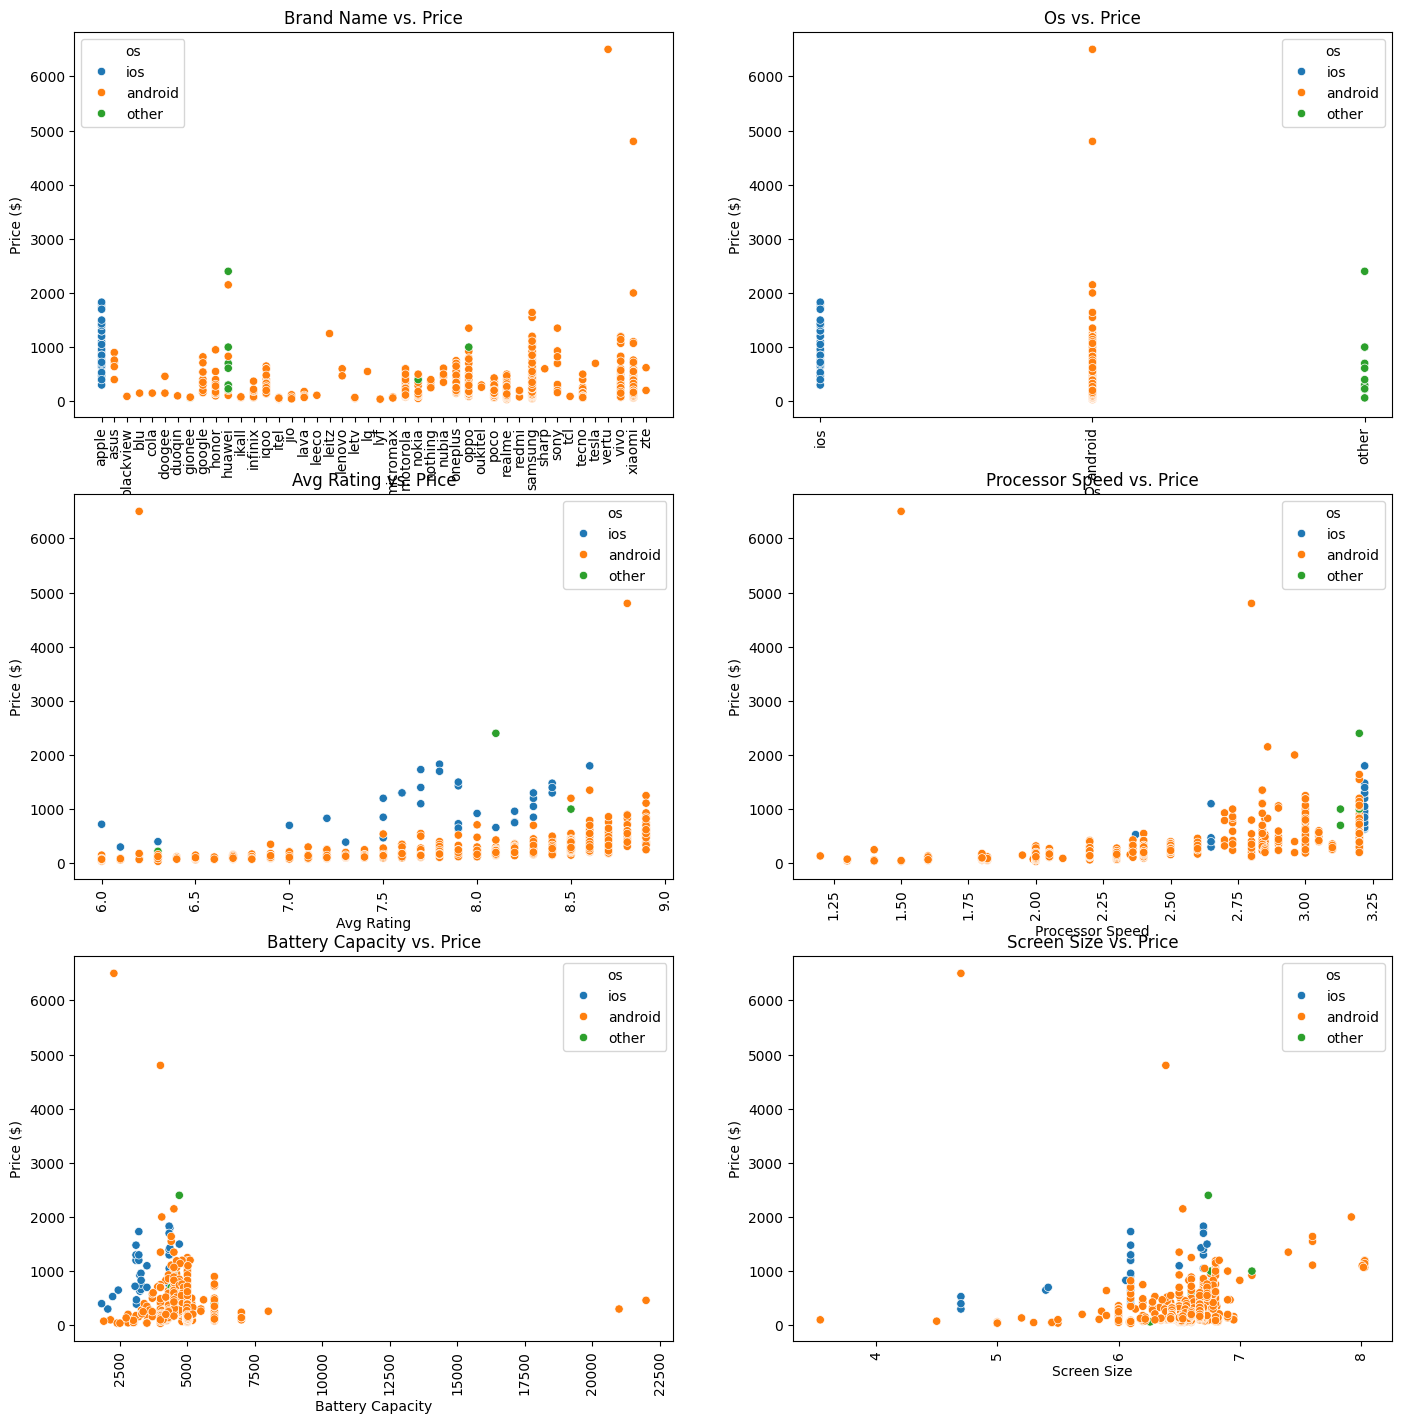

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


def column_to_label(column_name):
    """
    Converts a column name in a pandas DataFrame to a string that can be
    used as a label in a plot.
    
    :param column_name: string containing original column name
    :return: string that is ready to be presented on a plot
    """
    
    # Validate that column_name is a string
    if isinstance(column_name, str):
        return " ".join(column_name.split("_")).title()
    
    # If the value provided is not a string, raise an Exception
    else:
        raise Exception("Please makes sure to pass a value of type 'str'.")


def visualize_versus_price(ax, clean_data, x):
    """
    Use seaborn and matplotlib to identify a pattern between avg_rating and 
    battery_capacity.
    
    :param clean_data: a pandas DataFrame containing cleaned smartphone data
    :param x: variable to be plotted on the x-axis
    :return: None
    """
    
    # Create the scatterplot
    sns.scatterplot(ax=ax, x = x, y = "price", data = clean_data, hue = "os")
    
    # Add x and y labels
    ax.set_xlabel(column_to_label(x))
    ax.set_ylabel("Price ($)")
    ax.tick_params(axis = "x", rotation = 90)
    
    # Add a title to the plot
    #plt.title(f"{' '.column_to_label(x) vs. Price}")
    ax.set_title(f"{column_to_label(x)} vs. Price")
    
# Call the visualize_versus_price function
fig, axs = plt.subplots(3, 2, figsize=(17, 17))
axs = axs.flatten()
variables = list(cleaned_data.columns)
variables.remove("price")
for i, var in enumerate(variables):
    visualize_versus_price(axs[i], cleaned_data, var)


C:\Users\behza\AppData\Local\Temp\ipykernel_6544\569204260.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


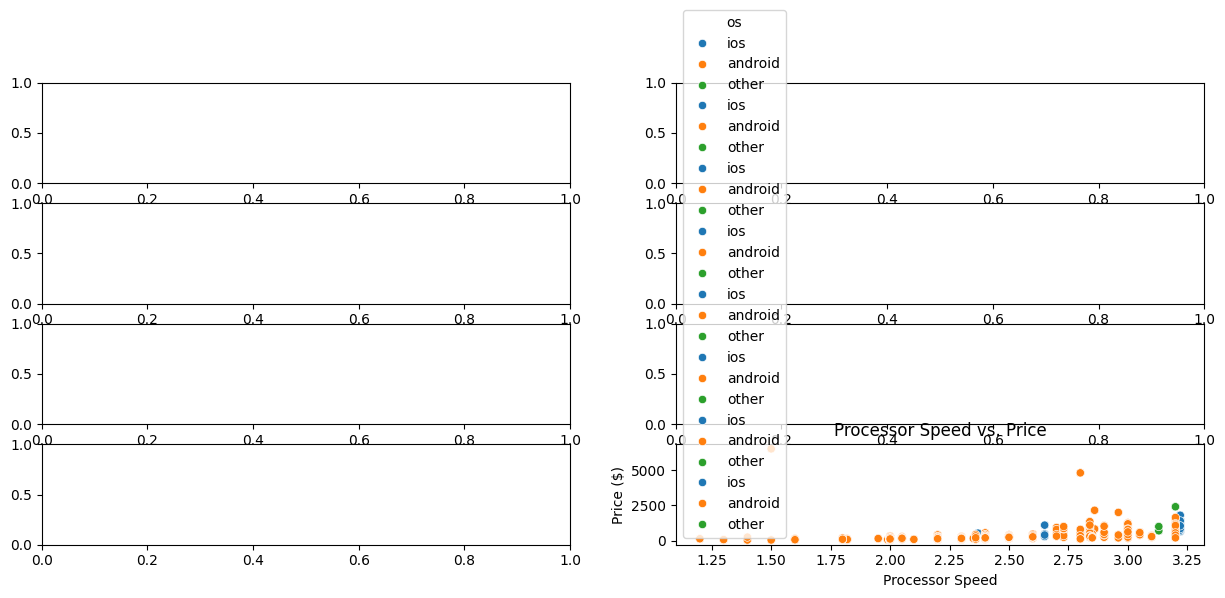

In [7]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(4, 2, figsize=(15, 6))

# Loop through the axes and plot data
for i, ax in enumerate(axs.flat):
    visualize_versus_price(cleaned_data, "processor_speed")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [3]:
# Import required packages
import pytest
import ipytest

ipytest.config.rewrite_asserts = True
__file__ = "notebook.ipynb"


# Create a clean DataFrame fixture
@pytest.fixture()
def clean_smartphone_data():
    return prepare_smartphone_data("smartphones.csv")

    
def test_nan_values(clean_smartphone_data):
    """
    Test for no NaN value for "battery_capacity" or "os"
    """
    
    # Assert there are no NaN value in "battery_capacity" or "os"
    assert clean_smartphone_data["battery_capacity"].isnull().sum() == 0
    assert clean_smartphone_data["os"].isnull().sum() == 0


    
ipytest.run("-qq")


.                                                                                            [100%]
======================================== warnings summary =========================================
t_1cf75e92a30144a2afec2f067d8376e0.py::test_nan_values
  C:\Users\behza\AppData\Local\Temp\ipykernel_6544\3816809088.py:41: SettingWithCopyWarning: 
  A value is trying to be set on a copy of a slice from a DataFrame.
  Try using .loc[row_indexer,col_indexer] = value instead
  
  See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
    reduced_data["price"] = reduced_data["price"] / 100

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html


<ExitCode.OK: 0>